# This basically a TSP (single-robot, no-failure, no-depletion)

Consider nodes placed uniformly along X and Y axes like so.

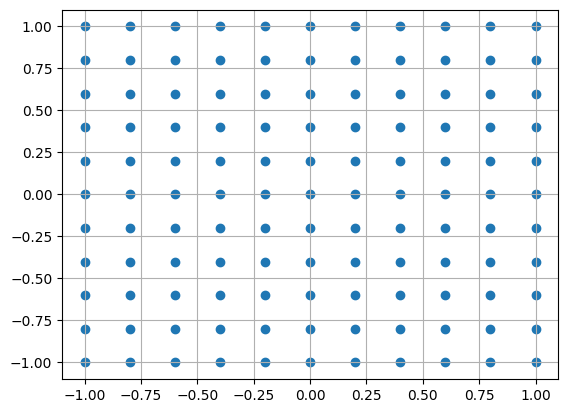

In [14]:
from matplotlib import pyplot as plt
import numpy as np

delta = 0.2
i, j = np.mgrid[-1:1+delta:delta, -1.:1+delta:delta]
plt.figure()
plt.scatter(i, j)
plt.grid()
plt.show()

## TSP Model Formulation

### Sets and Indices
$i, j \in Nodes $: indices and set of nodes.

$\text{Edges}= \{(i,j) \in Nodes \times Nodes \}$: Set of allowed edges (All for now, so this is fully connected)

$S \subset Nodes$: A subset of the set of Nodes.

$G = (Nodes, Edges)$: A graph where the set $Nodes$ defines the set of nodes and the set $Edges$ defines the set of edges.

### Parameters

$d_{i, j} \in \mathbb{R}^+$: Distance from node $i$ to node $j$, for all $(i, j) \in Edges$.

### Decision Variables
$x_{i, j} \in \{0, 1\}$: This variable is equal to 1, if we decide to connect node $i$ with node $j$. Otherwise, the decision variable is equal to zero.

### Objective Function
- **Shortest Route**. Minimize the total distance of a route. A route is a sequence of nodes where the robot visits each node only once and returns to the starting node. This forms a loop and the robot can follow this persistently. 

\begin{equation}
\text{Min} \quad Z = \sum_{(i,j) \in \text{Edges}}d_{i,j} \cdot x_{i,j}
\tag{0}
\end{equation}

### Constraints
- **Symmetry Constraints**. For each edge $(i,j)$ that is visited, make sure $(j,i)$ is also marked visited/crossed.

\begin{equation}
x_{i, j} = x_{j, i} \quad \forall (i, j) \in Edges
\tag{1}
\end{equation}

- **Entering and leaving a node**. For each node $i$, ensure that this node is connected to two other nodes.

\begin{equation}
\sum_{(i,j) \in \text{Edges}}x_{i,j} = 2 \quad \forall  i \in Nodes
\tag{2}
\end{equation}

- **Subtour elimination**. These constraints ensure that for any subset of nodes $S$ of the set of $Nodes$, there is no cycle. That is, there is no route that visits all the nodes in the subset and returns to the origin node.

\begin{equation}
\sum_{(i \neq j) \in S}x_{i,j} \leq |S|-1 \quad \forall  S \subset  Nodes
\tag{3}
\end{equation}

- **Remark**. In general, if the number of nodes of the TSP is $n$, then the possible number of routes is n\!.
Since there are an exponential number of constraints ($2^{n} - 2$) to eliminate cycles, we use lazy constraints to dynamically eliminate those cycles.